## Read the file

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
PATH = "/content/drive/MyDrive/image_segmentation/data_quality/"
lines = np.genfromtxt(PATH+'lymphocyte.txt', dtype="str")
score = pd.DataFrame(lines)
score.head(3)

,0,1
0,TCGA-F4-6569-01Z-00-DX1.accbe317-9a4d-49b9-b9c...,0.3689400255680084
1,TCGA-D5-6929-01Z-00-DX1.5e555bba-87b2-440c-b6d...,0.6727685332298279
2,TCGA-D5-7000-01Z-00-DX1.fb08c430-2c8c-486b-a39...,0.42959266901016235


### Statistic

In [28]:
# Convert str to float
score[1] = score[1].astype(float)
print(score[1].describe())

count    21590.000000
mean         0.535460
std          0.164405
min          0.200184
25%          0.401185
50%          0.497582
75%          0.660295
max          0.939894
Name: 1, dtype: float64


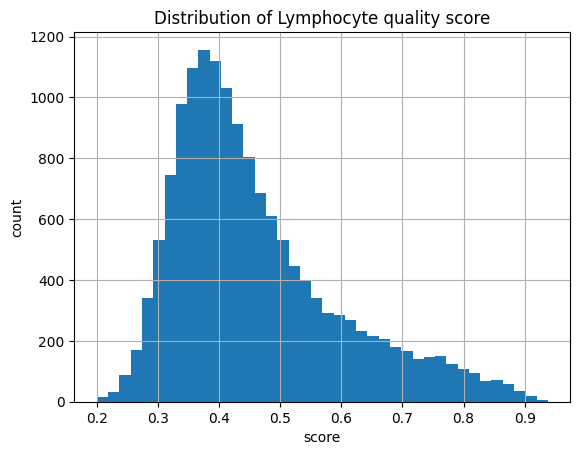

In [ ]:
score[1].hist(bins=40)

plt.xlabel('score')
plt.ylabel('count')
plt.title('Distribution of Lymphocyte quality score')
plt.show()

### Set a threshold and count the selected files

In [43]:
U_threshold = 1
L_threshold = 0.43
number_of_selected = score[1][(score[1] > L_threshold) & (score[1] < U_threshold)].count()
print(f"Select {number_of_selected} images from {score[1].count()} images, around {round(number_of_selected/score[1].count()*100, 2)}%")

Select 14445 images from 21590 images, around 66.91%


In [42]:
np.savetxt(f'lym_{L_threshold}to{U_threshold}.txt', score[0][(score[1] > L_threshold) & (score[1] < U_threshold)], fmt='%s')

## Cell Description


Histological descriptions provided by the collaborator pathologist:

1.⁠ ⁠Lymphocytes:

Small, round cells with a darkly stained, dense nucleus and minimal cytoplasm. Some of them also show a clear space (halo) around them.

2.⁠ ⁠Eosinophils:

Relatively small cells that have bi-lobed (segmented) nuclei and a distinctive cytoplasm filled with bright eosinophilic granules.

3.⁠ ⁠Neutrophils:

Relatively small cells that have multi-lobed nuclei and pale cytoplasm.

4.⁠ ⁠Plasma cells:

Intermediate size cells that are characterized by eccentric nuclei with a clock-face chromatin pattern and abundant basophilic cytoplasm.

5.⁠ ⁠Tumor cells:

Pleomorphic, large cells, with large nuclei and frequent nuclear hyperchromasia or prominent nucleoli. They may form irregular glandular structures or solid sheets, depending on the growth pattern of the tumor.


(from ChatGPT 4o)

Here's a histological description for each of these cell types:

1.⁠ ⁠*Lymphocytes*:
   - Lymphocytes are small, round cells with dense, dark-staining nuclei and minimal cytoplasm, appearing as a thin, basophilic rim around the nucleus. They have a high nucleus-to-cytoplasm (N:C) ratio and are usually found clustered around blood vessels or scattered throughout the tissue. Lymphocytes can vary in size, with small lymphocytes often being indistinguishable without specific immunostaining.

2.⁠ ⁠*Eosinophils*:
   - Eosinophils are recognizable by their bilobed nuclei and large, eosinophilic (pink to red) cytoplasmic granules due to the affinity of these granules for acidic dyes. These granules contain proteins like major basic protein and eosinophil peroxidase, which contribute to their distinct coloration. Eosinophils are typically seen in allergic reactions, parasitic infections, and some tumors.

3.⁠ ⁠*Neutrophils*:
   - Neutrophils have multilobed (often tri- to pentalobed) nuclei and a pale, slightly granular cytoplasm. Their granules are small and neutral-staining, giving the cytoplasm a slightly pink to lavender hue. Neutrophils are often found at sites of acute inflammation and tissue injury, where they may exhibit a “band” formation, indicative of immature neutrophils during active infection or inflammation.

4.⁠ ⁠*Plasma Cells*:
   - Plasma cells have an eccentric, round nucleus with characteristic “clock-face” chromatin distribution. The cytoplasm is basophilic due to the abundance of rough endoplasmic reticulum, and there is often a pale perinuclear zone (Golgi apparatus) visible adjacent to the nucleus. Plasma cells are prominent in chronic inflammation and antibody-producing immune responses.

5.⁠ ⁠*Tumor Cells*:
   - Tumor cells vary widely in appearance depending on their origin. Generally, malignant tumor cells have increased nuclear size, irregular nuclear contours, prominent nucleoli, and high mitotic activity. They often show nuclear atypia, abnormal chromatin patterns, and pleomorphism (variability in shape and size). Tumor cells may form clusters, sheets, or structures reminiscent of the tissue from which they originated, depending on their differentiation level.
